In [1]:
import sys, os, praw
import networkx as nx
import matplotlib.pyplot as plt
from stackapi import StackAPI
from bs4 import BeautifulSoup

sys.path.append(os.path.abspath("../../src/"))
from helper.convmanager import *
from helper.utils import *

credentials = Credentials('../../res/credentials.yml')

## Getting the Reddit instance

In [2]:
USER_AGENT = 'linux:com.example.argumentation:v0.0.1 (by /u/anzianotti)'

reddit = praw.Reddit(
    client_id=credentials.reddit['CLIENT_ID'],
    client_secret=credentials.reddit['CLIENT_SECRET'],
    user_agent=USER_AGENT)

## Retrieve the comments

In [3]:
%%time
submissionId = '8s67ow'
submission   = reddit.submission(submissionId)

res = getAll(reddit, '8s67ow', verbose=False)
comments = to_comments(res)

print('SUBMISSION: %s' % submission.title)
print('NUMBER OF COMMENTS: %s' % len(comments))
print()

SUBMISSION: Incredible lies about Dash PrivateSend | A Refutation
NUMBER OF COMMENTS: 79

CPU times: user 222 ms, sys: 13.2 ms, total: 235 ms
Wall time: 3.09 s


## Build the Graph

In [4]:
%%time
plt.rcParams["figure.figsize"] = [15, 7]
plt.style.use('ggplot')

Graph = nx.DiGraph()

for i, comment in enumerate(comments):
    if comment.parent is not None:
        similarity = 1.0
        Graph.add_edge(comment.id, comment.parent, weight=similarity)
    else:
        pass

CPU times: user 1.04 ms, sys: 1 µs, total: 1.04 ms
Wall time: 1.07 ms


## Plot the Graph

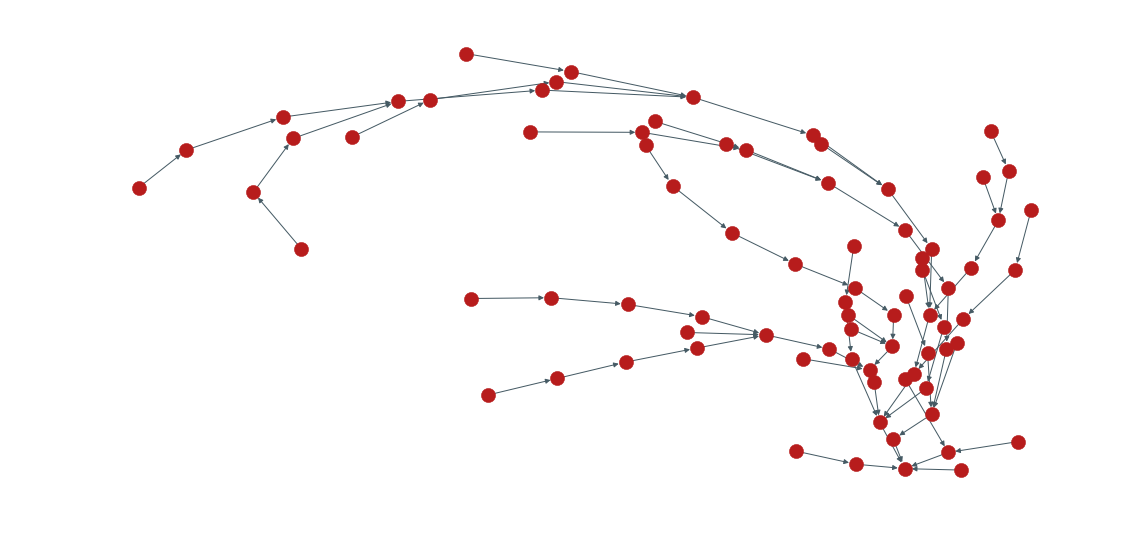

In [6]:
pos = nx.spring_layout(Graph)
edge_labels = nx.get_edge_attributes(Graph, 'weight')

draw_options = {
    'with_labels': False,
    'node_shape' : 'o',
    'node_color' : '#B71C1C',
    'edge_color' : '#455A64',
    'node_size'  : 200,
    'width': 1
}

nx.draw(Graph, pos, **draw_options)
# nx.draw_networkx_edge_labels(Graph, pos, edge_labels=edge_labels, font_color='#006064');